#### Imports 

In [1]:
import numpy as np
import re 
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

%matplotlib inline

### The Project at First Glance

    The goal of this project is to analyze what we know about COVID-19's statistical significance, as well as conduct a forecast analysis to predict the severity of COVID-19 as we approach the Winter season. Could there be another arduous wave of COVID-19 through Winter? If so, how detrimental may it be toward our efforts to flatten the curve?
    
- Dataset - https://raw.githubusercontent.com/CSSEGISandData/COVID-19/ (Johns Hopkins CSSEGIS, Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE))

# Part 1 : Confirmed Cases Data Retrieval

I started by gathering data for all confirmed cases of COVID-19 to date, and cleaned it up to be versatile for later steps. Separation of cases in a heirarchy is my next step, where I will retrieve data for confirmed fatalities due to COVID-19, recoveries, and remaining active confirmed cases that are inconclusive. 

#### *Subset 1 - Confirmed Cases of COVID-19*

In [2]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

covid_confirmed['Province/State'].fillna('', inplace=True)
covid_confirmed['Country/Region'].fillna('', inplace=True)

covid_confirmed.info() 
covid_confirmed.isna().sum().sum()
covid_confirmed.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 173 entries, Province/State to 7/8/20
dtypes: float64(2), int64(169), object(2)
memory usage: 359.6+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,276,284,291,315,328,346,346,346,386,386


#### *Subset 2 - Confirmed Deaths Due to COVID-19*

In [3]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

covid_deaths = pd.read_csv(COVID_DEATHS_URL)

covid_deaths['Province/State'].fillna('', inplace=True)
covid_deaths['Country/Region'].fillna('', inplace=True)

covid_deaths.info()
covid_deaths.isna().sum().sum()
covid_deaths.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 173 entries, Province/State to 7/8/20
dtypes: float64(2), int64(169), object(2)
memory usage: 359.6+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,733,746,774,807,819,826,864,898,920,936
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,58,62,65,69,72,74,76,79,81,83
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,905,912,920,928,937,946,952,959,968,978
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,13,15,17,18,19,19,19,21,21


#### *Subset 3 - Confirmed Recoveries from COVID-19*

In [4]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

covid_recovered['Province/State'].fillna('', inplace=True)
covid_recovered['Country/Region'].fillna('', inplace=True)

covid_recovered.info()
covid_recovered.isna().sum().sum()
covid_recovered.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 173 entries, Province/State to 7/8/20
dtypes: float64(2), int64(169), object(2)
memory usage: 342.1+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700


# Part 2 - Time Series Data Breakdown

Within the next portion of this exploratory data analysis, my goal was to take a granular approach for complete understanding of the data. I conducted a time series data analysis of all countries with some feature engineering to show the regression pattern for each of the following: 

+ Confirmed Case Total by Month to Date
+ Confirmed Deaths Total by Month to Date
+ Confirmed Recoveries Total by Month to Date
+ Confirmed Active (Inconclusive) Cases by Month to Date 


#### Time Series Analysis : Confirmed Case Total by Month to Date 
+ Time series data analysis for confirmed cases of COVID-19

## 1 - Confirmed Cases 

#### MAX CONFIRMED CASES IN A GIVEN MONTH

In [5]:
covid_confirmed_raw = covid_confirmed.loc[:, '1/22/20':]
covid_confirmed_count = covid_confirmed_raw.sum().max()
covid_confirmed_raw.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,0,0,0,0,0,0,0,0,0,0,...,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594
1,0,0,0,0,0,0,0,0,0,0,...,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106
2,0,0,0,0,0,0,0,0,0,0,...,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,276,284,291,315,328,346,346,346,386,386


In [6]:
raw_confirmed_cases_ts = covid_confirmed.iloc[:, 4:].sum(axis=0)

raw_confirmed_cases_ts

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
7/4/20     11269114
7/5/20     11452196
7/6/20     11620096
7/7/20     11829602
7/8/20     12041480
Length: 169, dtype: int64

In [7]:
covid_confirmed_count

12041480

<Figure size 576x396 with 0 Axes>

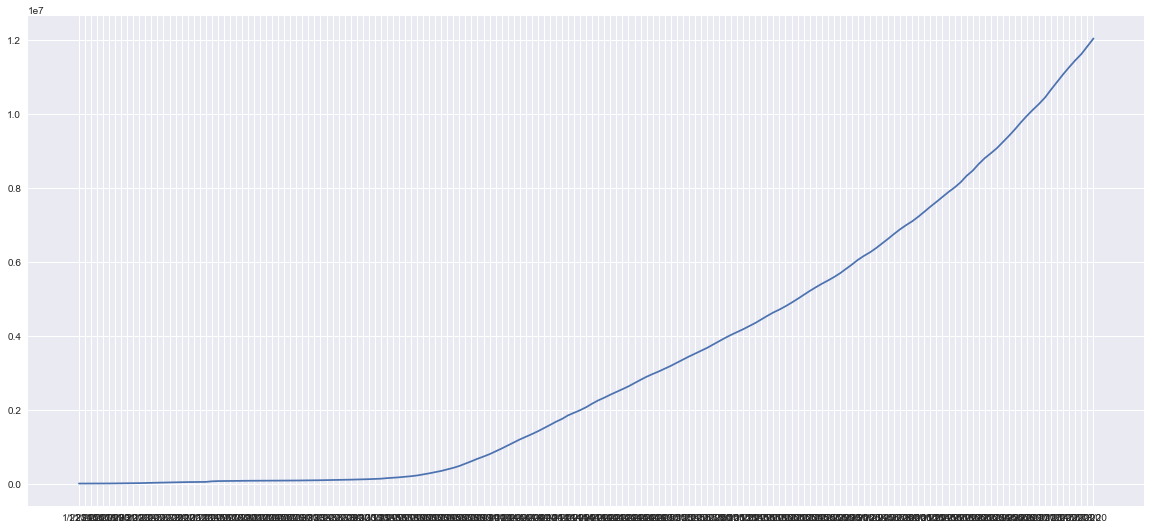

In [8]:
# Building time series plot # 

## Styling ## 
plt.style.use('seaborn')
plt.tight_layout()

plt.figure(figsize=(20,10))
plt.gcf().autofmt_xdate()
plt.plot(raw_confirmed_cases_ts, linestyle='solid')
plt.show()


### 2 - Confirmed Deaths

#### MAX CONFIRMED DEATHS IN A GIVEN MONTH


In [9]:
raw_confirmed_deaths_ts = covid_deaths.loc[:, '1/22/20':]
covid_deaths_count = raw_confirmed_deaths_ts.sum().max()
raw_confirmed_deaths_ts.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,0,0,0,0,0,0,0,0,0,0,...,733,746,774,807,819,826,864,898,920,936
1,0,0,0,0,0,0,0,0,0,0,...,58,62,65,69,72,74,76,79,81,83
2,0,0,0,0,0,0,0,0,0,0,...,905,912,920,928,937,946,952,959,968,978
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,11,13,15,17,18,19,19,19,21,21


In [10]:
raw_confirmed_deaths_ts = covid_deaths.iloc[:, 4:].sum(axis=0)

raw_confirmed_deaths_ts

1/22/20        17
1/23/20        18
1/24/20        26
1/25/20        42
1/26/20        56
            ...  
7/4/20     530767
7/5/20     534280
7/6/20     538058
7/7/20     544163
7/8/20     549468
Length: 169, dtype: int64

In [11]:
covid_deaths_count

549468

<Figure size 576x396 with 0 Axes>

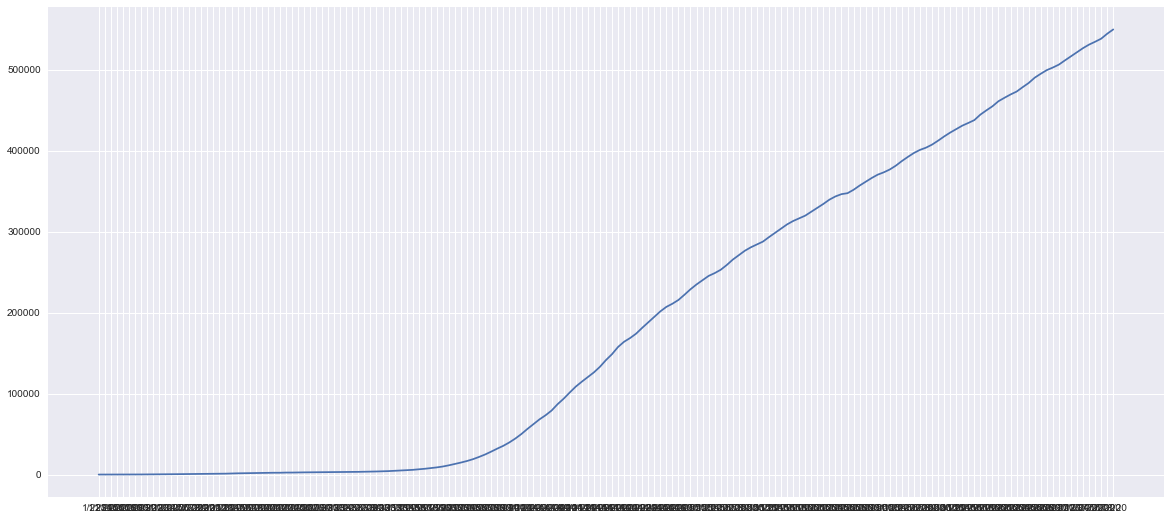

In [12]:
# Building time series plot # 

## Styling ## 
plt.style.use('seaborn')
plt.tight_layout()

plt.figure(figsize=(20,10))
plt.gcf().autofmt_xdate()
plt.plot(raw_confirmed_deaths_ts, linestyle='solid')
plt.show()


### 3 - Confirmed Recoveries

#### MAX CONFIRMED RECOVERIES IN A GIVEN MONTH

In [13]:
raw_confirmed_recoveries_ts = covid_recovered.loc[:, '1/22/20':]
covid_recovered_count = raw_confirmed_recoveries_ts.sum().max()
raw_confirmed_recoveries_ts.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
0,0,0,0,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700
1,0,0,0,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791
2,0,0,0,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329
3,0,0,0,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802
4,0,0,0,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117


In [14]:
raw_confirmed_recoveries_ts = covid_recovered.iloc[:, 4:].sum(axis=0)

raw_confirmed_recoveries_ts

1/22/20         28
1/23/20         30
1/24/20         36
1/25/20         39
1/26/20         52
            ...   
7/4/20     6059565
7/5/20     6179006
7/6/20     6302626
7/7/20     6447656
7/8/20     6586726
Length: 169, dtype: int64

In [15]:
covid_recovered_count

6586726

<Figure size 576x396 with 0 Axes>

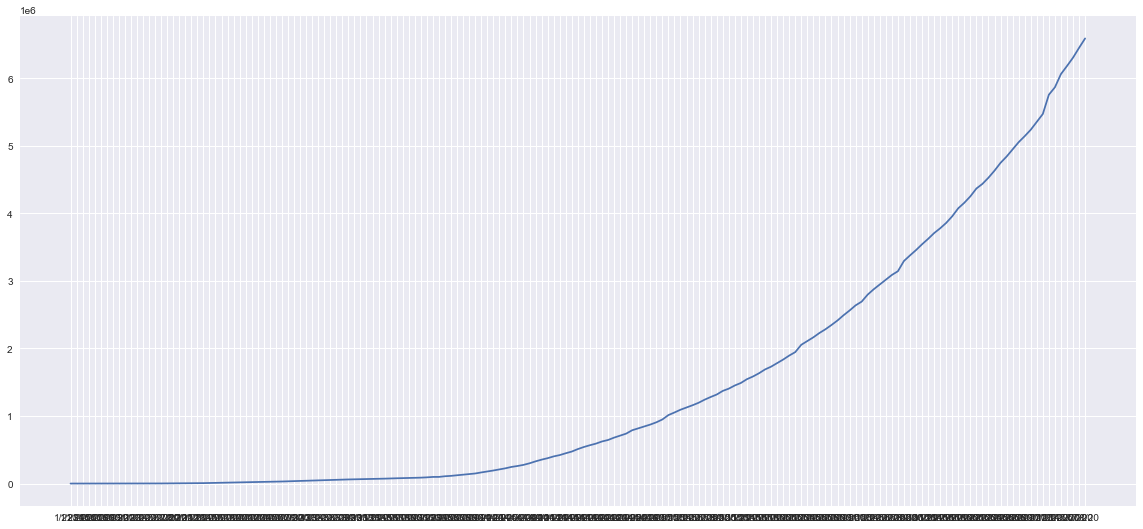

In [16]:
# Building time series plot # 

## Styling ## 
plt.style.use('seaborn')
plt.tight_layout()

plt.figure(figsize=(20,10))
plt.gcf().autofmt_xdate()
plt.plot(raw_confirmed_recoveries_ts, linestyle='solid')
plt.show()


In [17]:
covid_recovered_count

6586726

## 4 - Active (Inconclusive) Cases 

In [28]:
raw_confirmed_active_ts = raw_confirmed_cases_ts - raw_confirmed_deaths_ts - raw_confirmed_recoveries_ts

raw_confirmed_active_ts.head()

1/22/20     510
1/23/20     606
1/24/20     879
1/25/20    1353
1/26/20    2010
dtype: int64

In [29]:
covid_active_count = covid_confirmed_count - covid_deaths_count - covid_recovered_count
covid_active_count

4905286

<Figure size 576x396 with 0 Axes>

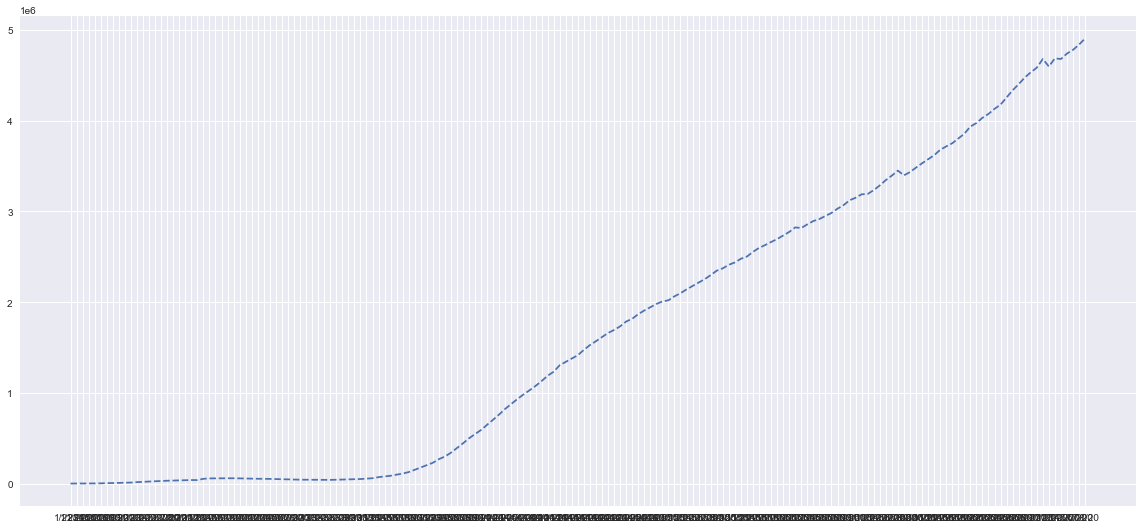

In [30]:
# Building time series plot # 

## Styling ## 
plt.style.use('seaborn')
plt.tight_layout()

plt.figure(figsize=(20,10))
plt.gcf().autofmt_xdate()
plt.plot(raw_confirmed_active_ts, linestyle='--')
plt.show()

In [31]:
# Creating a dataframe summarizing confirmed cases and those that are still active, awaiting conclusion
raw_confirmed_active_ts = [covid_confirmed_count - covid_deaths_count - covid_recovered_count]
world_df = pd.DataFrame({
    'confirmed': [covid_confirmed_count],
    'deaths': [covid_deaths_count],
    'recovered': [covid_recovered_count],
    'active': raw_confirmed_active_ts
})

world_df

,confirmed,deaths,recovered,active
0,12041480,549468,6586726,4905286


In [32]:
# Creating a dataframe summarizing max confirmed cases and their statuses

world_long_df = world_df.melt(value_vars=['active', 'deaths', 'recovered'],
                              var_name="status",
                              value_name="count")

world_long_df['upper'] = 'confirmed'

world_long_df

,status,count,upper
0,active,4905286,confirmed
1,deaths,549468,confirmed
2,recovered,6586726,confirmed


# Part 2. Total Active Cases, Deaths, & Recoveries 

### Bar Chart 
   This will display the relationships between active cases and how many may potentially result in recovery or become fatal

<BarContainer object of 3 artists>

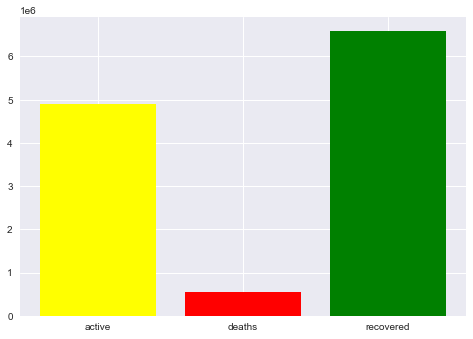

In [33]:
colors = ['yellow', 'red', 'green'] 
plt.bar(x=world_long_df['status'], height=world_long_df['count'], align='center', color=colors)

## Treemap 

This will display the mapping of total confirmed cases, and the ratio of recoveries to active(inconclusive) cases as well as deaths

In [34]:
fig = px.treemap(world_long_df, path=["upper", "status"], values="count",
                 color_discrete_sequence=['#00CC66', '#FFFF00', '#e74c3c'])

fig.show()

## Time Series Plot (WIP)

This summarizes the logarithmic regression patterns among confirmed cases, deaths, recoveries, and active (inconclusive) cases. Here, we can see that the dips in each line 

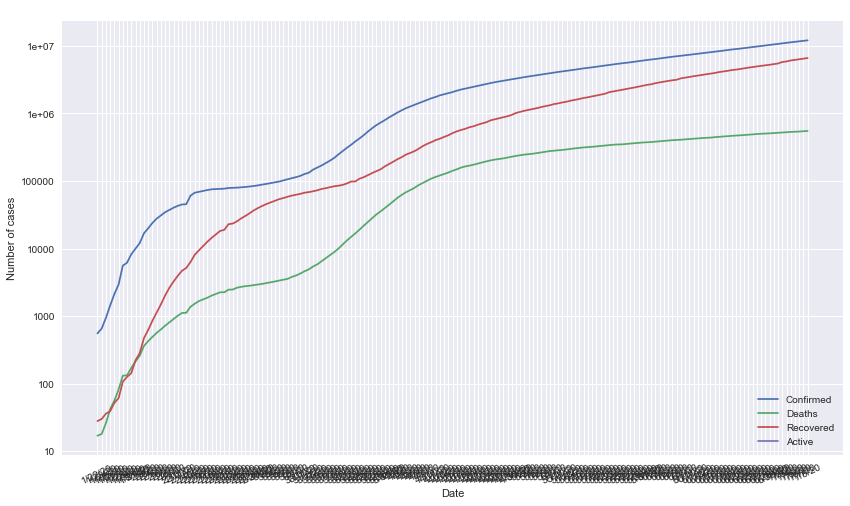

In [52]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

plt.plot(raw_confirmed_cases_ts, label="Confirmed")
plt.plot(raw_confirmed_deaths_ts, label="Deaths")
plt.plot(raw_confirmed_recoveries_ts, label="Recovered")
plt.plot(raw_confirmed_active_ts, label="Active")

# ax.lines[0].set_linestyle("--")

plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=25)
plt.xlabel('Date')
plt.ylabel('Number of cases')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()